In [1]:
import boto3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Defining the bucket 
s3 = boto3.resource('s3')
bucket_name = 'data-445'
bucket = s3.Bucket(bucket_name)

## Defining the csv file 
file_key = 'Fall_2021/In_Class_Assignments/Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
## Dropping No and transaction_date
house_price = house_price.drop(columns = ['No', 'transaction_date'], axis = 1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
from sklearn.model_selection import train_test_split

## Defining the input and target variables
X = house_price.drop(columns = ['house_price_of_unit_area'], axis = 1)
Y = house_price['house_price_of_unit_area']

## Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## Building the linear model 
from sklearn.linear_model import LinearRegression
lm_md_1 = LinearRegression().fit(X_train, Y_train)

## Predicting on test
preds_1 = lm_md_1.predict(X_test)

## Computing the mse
mse_1 = np.mean(np.power(preds_1 - Y_test, 2))
mse_1

68.19054530062851

In [5]:
X_train_new = X_train.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1)
X_test_new = X_test.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1)

lm_md_2 = LinearRegression().fit(X_train_new, Y_train)

## Predicting on test
preds_2 = lm_md_2.predict(X_test_new)

## Computing the mse
mse_2 = np.mean(np.power(preds_2 - Y_test, 2))
mse_2

77.86472218801327

In [6]:
## Defining list to store results
md1_results = []
md2_results = []

for i in range(0, 100):
    
    ## Splitting the data 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    
    ## Defining data for the second model
    X_train_new = X_train.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1)
    X_test_new = X_test.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1)
    
    ## Model 1
    md1 = LinearRegression().fit(X_train, Y_train)
    pred1 = md1.predict(X_test)
    mse1 = np.mean(np.power(pred1 - Y_test, 2))
    md1_results.append(mse1)
    
    ## Model 2
    md2 = LinearRegression().fit(X_train_new, Y_train)
    pred2 = md2.predict(X_test_new)
    mse2 = np.mean(np.power(pred2 - Y_test, 2))
    md2_results.append(mse2)    

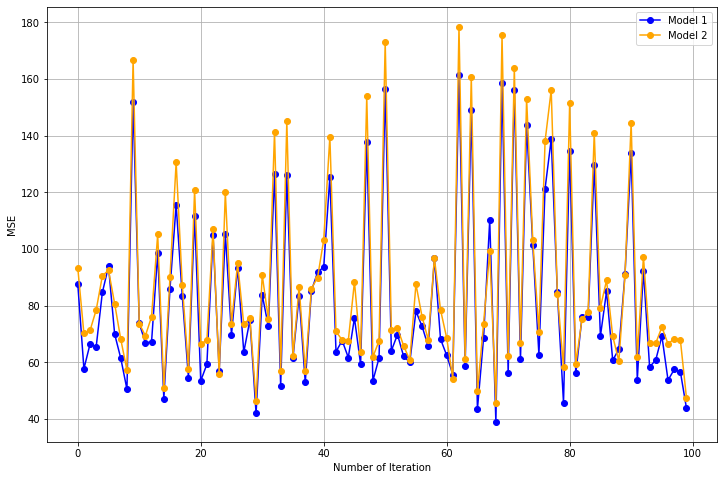

In [9]:
import matplotlib.pyplot as plt

## Plotting iteration results
fig = plt.figure(figsize = (12, 8))

iterations = range(0, 100)
plt.plot(iterations, md1_results, marker = 'o', color = 'blue', label = 'Model (d)')
plt.plot(iterations, md2_results, marker = 'o', color = 'orange', label = 'Model (e)')
plt.xlabel('Number of Iteration')
plt.ylabel('MSE')
plt.legend()
plt.grid()

fig.savefig('plot1.pdf')

plt.show()